# Анализ рынка компьютерных игр

## Описание проекта

**Исследование проводится для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В исходном датасете представлены данные до 2016 года.**

### Описание данных

- `Name` — **название игры**;
- `Platform` — **платформа**;
- `Year_of_Release` — **год выпуска**;
- `Genre` — **жанр игры**;
- `NA_sales` — **продажи в Северной Америке (миллионы проданных копий)**;
- `EU_sales` — **продажи в Европе (миллионы проданных копий)**;
- `JP_sales` — **продажи в Японии (миллионы проданных копий)**;
- `Other_sales` — **продажи в других странах (миллионы проданных копий)**;
- `Critic_Score` — **оценка критиков (максимум 100)**;
- `User_Score` — **оценка пользователей (максимум 10)**;
- `Rating` — **рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию**;

### Цели проекта





- `Выявление закономерностей, определяющие успешность и продаваемость игры`
- `Формирование прогноза на 2017 год`


## Ход исследования

**Исходные данные о играх яполучу из файлов /datasets/games.csv,**
**О качестве исходных данных ничего не известно. Поэтому перед проведением исследования понадобится обзор данных и их предобработка**

**Я проверю исходные датасеты на наличие ошибок, пропусков, дубликатов и артефактов, а также оценю их влияние на исследование. За тем в предобработке поищу способы исправить ошибки в данных, которые могут привести к искажению результата. Далее создам необходимые столбцы и приступлю к выполнению исследования.**

**Короткий план исследования:**
- **Обзор данных**
- **Предобработка**
- **добавление недостающих столбцов**
- **Исследование требуемых по  техническому заданию зависимостей**
- **Общий вывод**
- **Итоговые рекомендации**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')

In [2]:
try:
    games1 =  pd.read_csv('https://code.s3.yandex.net/datasets/games.csv',  sep=',')

except:
    print('Не удается загрузить исходные данные')
display(games1.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Изучили общую информацию об исходных данных**

In [3]:
games1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Из знакомства с исходными данными видно, что в датасете 16715 строк. В большинстве столбцов столько же ненулевых строк, однако в 9 и 10 столбце их почти в двое меньше что говорит о большом количестве пропусков. Некоторые столбцы имеют неправильный тип данных. Например, столбец с пользовательскими рейтингами имеет строковый тип данных**

## Предварительная обработка

**Привели названия столбцов к нижнему регистру**

In [4]:
games1.columns = games1.columns.str.lower()

games1.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Добавили столбец с суммарными продажами**

In [5]:
games1['all_sales'] = games1['na_sales'] + games1['eu_sales'] + games1['jp_sales'] + games1['other_sales']
games1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Изменение типов данных 

**В результате общей оценки данных обнаружилось несоответствие типов данных. Изменили тип данных столбца `Year_of_Realise` на** *datetime*, **`Critic_Scope` на** *int* **и `User_scope` на** *int*

**В столбце с пользовательскими рейтингами помимо чисел и пропусков присутствует значение `tbd` или `to be determined`(в переводе на русский язык *будет определено*)
Тоесть это значение следует прировнять к пропускам, поэтому будет абсолютно правомерно изменить тип данных на `int`**

In [6]:
games1['year_of_release'] = pd.to_datetime(games1['year_of_release'], format='%Y', errors='coerce')
games1['year_of_release'] = games1['year_of_release'].dt.year.astype('Int64')
games1['user_score'] = pd.to_numeric(games1['user_score'],  
                                       errors='coerce', downcast='float')


games1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
 11  all_sales        16715 non-null  float64
dtypes: Int64(1), float32(1), float64(6), object(4)
memory usage: 1.5+ MB


### Удаление пропусков

**Проверили исходные данные на наличие пропусков**

In [7]:
display(pd.DataFrame(round(games1.isna().mean()*100,)).style.background_gradient('coolwarm'))

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [8]:
games1.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
all_sales             0
dtype: int64

**Проверка показала, основная часть пропусков находится в столбцах с рейтингами. Т.к заполнить пропуски медианным значением нерационально(Т.к значения не являются набором случайных наблюдений) и удалить пропуски нельзя(т.к потеряется половина исходного датасета), то будет наиболее верно оставить пропуски, как есть. В столбце с годом процент пропусков слишком мал, поэтому их можно просто удалить**

**В столбце с рейтингом пропусков очень много(около 50%), поэтому просто удалить пропуски не получится. Тогда следует заменить пропуски значением `No ESRB`**

In [9]:
games1.dropna(subset=['year_of_release'], inplace=True)
games1['rating'].fillna('No ESRB', inplace=True)

games1.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
all_sales             0
dtype: int64

###  Удаление дубликатов

**Сначала проверили исходные данные на наличие явных дубликатов и удаили их**

In [10]:

games1.duplicated().sum()

0

**Явных дубликатов на обноружено**

**Проверили исходные данные на наличие неявных дубликатов**

In [11]:
games1['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
games1['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
games1['rating'].unique()

array(['E', 'No ESRB', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [14]:
games1 = games1.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
games1.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

**Проверили исходные данные на наличие неявных дубликатов строк, совпадающих по названию, платформе и году релиза одновременно. Они отсутствуют**

**Дубликаты в исходных данных отсутствуют**

### Вывод

**Было проведено 3 этапа обработки:**
   - `изменение типов данных`;
   - `Обработка пропусков`;
   - `Обработка дубликатов`;




**Исходные данные пригодны для дальнейшего исследования**

## Исследовательский анализ данных

### Зависимость количества выпущеных игр от года

**Посмотрели, сколько игр выпускалось в разные годы. И оценили, Важны ли данные за все период**

In [15]:
games1.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [16]:
games1 = games1.query('year_of_release >= 1997')

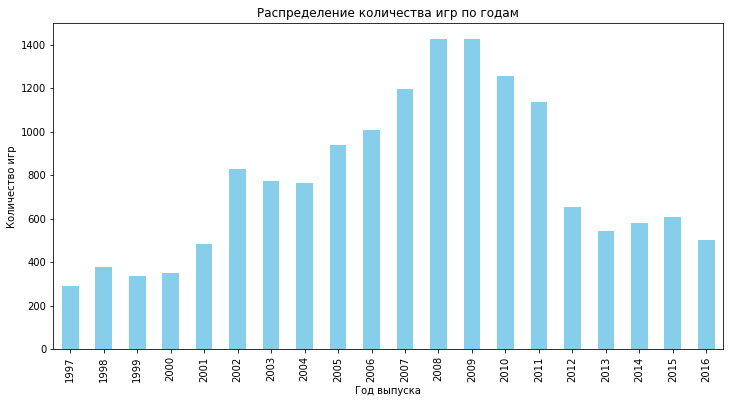

In [17]:
plt.figure(figsize=(12, 6))
games1.groupby('year_of_release')['name'].count().plot(kind='bar', color='skyblue')
plt.title('Распределение количества игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Оценка показала, что до 1997 года игр выпускалось сильно меньше, чем в последние года. наибольшее их количество было выпущено в 2008-2011 годах (Это связано с лавинообразным ростом распространения интернета и игровой индустрии в частности). Имеет смысл рассматривать данные за 1997- 2016 года**

### Исследование игровых платформ


**Выявили платформы с самым большими количеством проданных игр**

In [18]:
games_platforms = games1.groupby('platform')['name'].count().sort_values(ascending=False)
games_platforms.columns = ['platform', 'sales']
games_platforms

platform
PS2     2127
DS      2120
PS3     1305
Wii     1286
X360    1232
PSP     1193
PC       938
PS       910
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      298
XOne     247
WiiU     147
SAT       64
GB        54
DC        52
SNES       7
WS         6
Name: name, dtype: int64

**Для первых 3 платформ сгруппируем данные по годам, чтобы выяснить, как долго были популярны эти платформы**

In [19]:
games1.query('platform=="PS2"').groupby('year_of_release')['name'].count()

year_of_release
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    259
2007    214
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64

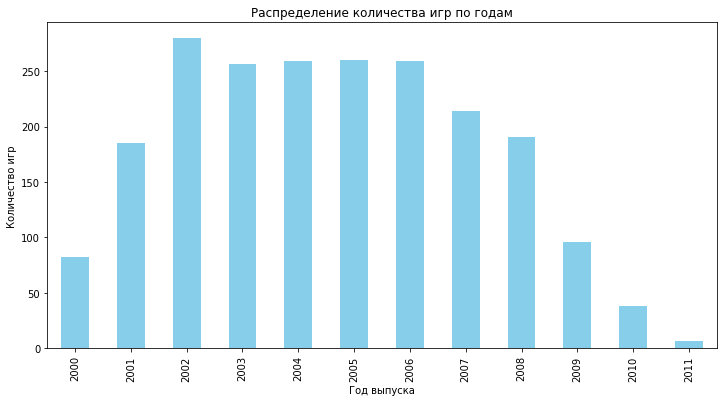

In [20]:

plt.figure(figsize=(12, 6))
games1.query('platform=="PS2"').groupby('year_of_release')['name'].count().plot(kind='bar', color='skyblue')
plt.title('Распределение количества игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Платформа ПС2 окончательно устарела и потеряла популярность в 2011 году, продержавшись 11 лет**

In [21]:
games1.query('platform=="DS"').groupby('year_of_release')['name'].count()

year_of_release
2004     23
2005    118
2006    201
2007    376
2008    492
2009    403
2010    323
2011    153
2012     23
2013      8
Name: name, dtype: int64

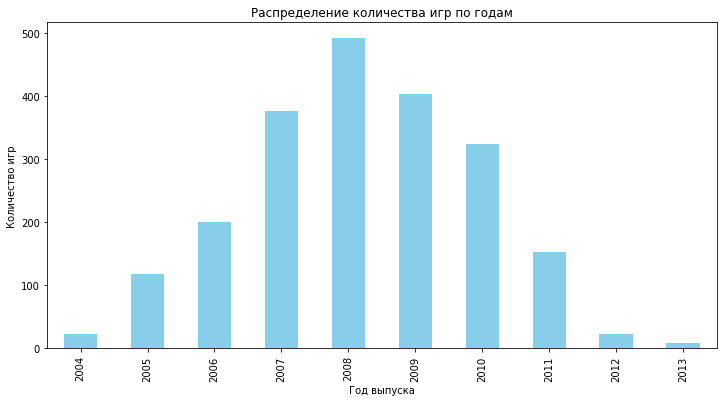

In [22]:
plt.figure(figsize=(12, 6))
games1.query('platform=="DS"').groupby('year_of_release')['name'].count().plot(kind='bar', color='skyblue')
plt.title('Распределение количества игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Платформа DS окончательно потеряла популярность в 2013 году, продержавшись 28 лет**

In [23]:
games1.query('platform=="PS3"').groupby('year_of_release')['name'].count()

year_of_release
2006     27
2007     90
2008    138
2009    162
2010    181
2011    215
2012    147
2013    126
2014    108
2015     73
2016     38
Name: name, dtype: int64

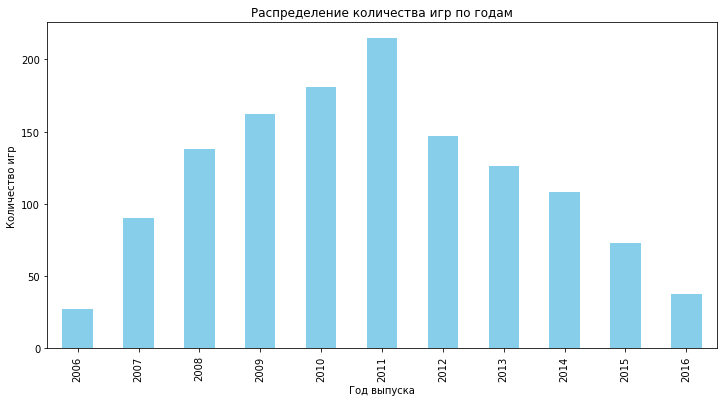

In [24]:
plt.figure(figsize=(12, 6))
games1.query('platform=="PS3"').groupby('year_of_release')['name'].count().plot(kind='bar', color='skyblue')
plt.title('Распределение количества игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Платформа ПС3 окончательно устарела и потеряла популярность в 2016 году, продержавшись 10 лет**

**Из проведенного исследования видно, что популярные платформы исчезают и появляются за 10-30 лет.За актуальный период было принято решение выбрать 1997 - 2016 годы**

In [25]:
games = games1.query('year_of_release>=2014')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No ESRB,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No ESRB,7.98


**построили диаграмму размаха для количества проданных игр для разных платформ и вычислили статистические показатели**

**Из построенных распределений видно, что платформы с самым большим количеством игр уже не актуальны(кроме ПС3). Поэтому для построения прогноза необходимо использовать именно самые новые данные(с достаточным количеством данных для исследования). Решил выбрать ПС3, Х360, ПК и ПС4**

**Построили график с усами и оценили статистические данные**

In [26]:
unique_platforms = pd.DataFrame(games['platform'].unique(), columns=['platform'])

In [27]:
def plcount(row):
    return games.query('platform==@row')['name'].count()

In [28]:
unique_platforms['count'] = unique_platforms['platform'].apply(plcount)

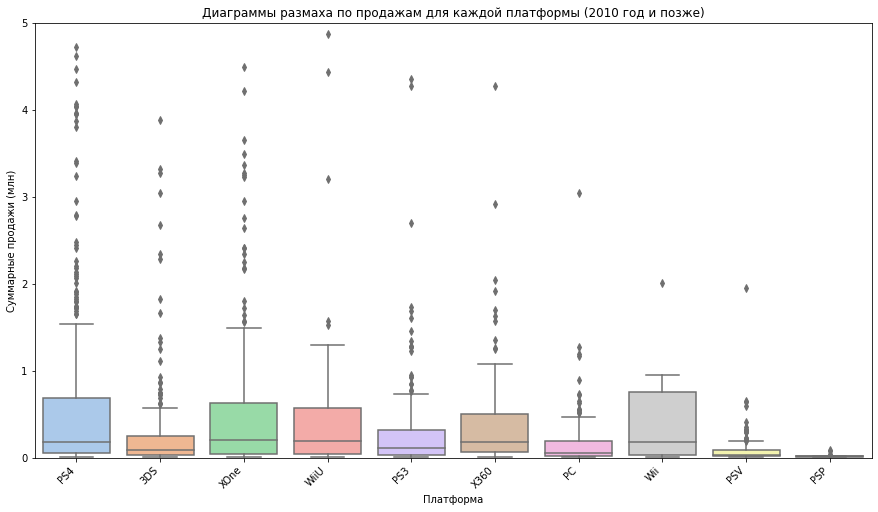

In [29]:


# Строим диаграмму размаха с использованием seaborn
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='all_sales', data=games, palette='pastel')
plt.title('Диаграммы размаха по продажам для каждой платформы (2010 год и позже)')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.show()

In [30]:
unique_platforms['count'].describe()

count     10.000000
mean     168.900000
std      119.609968
min       11.000000
25%       82.500000
50%      181.500000
75%      225.750000
max      376.000000
Name: count, dtype: float64

**Из вычисленных статистических данных видно, что в среднем около 247 игр. Для исследования будем использовать платформы с количеством игр более 500**

### Отзывы пользователей и критиков

**Изучили корреляцию продаваимости игр и отзывами пользователей и критиков**

**Для данного исследования была выбрана Пс2(на ней больше всего игр)**

/tmp/ipykernel_48/3826282437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['critic_score'] = c_score


<Figure size 720x432 with 0 Axes>

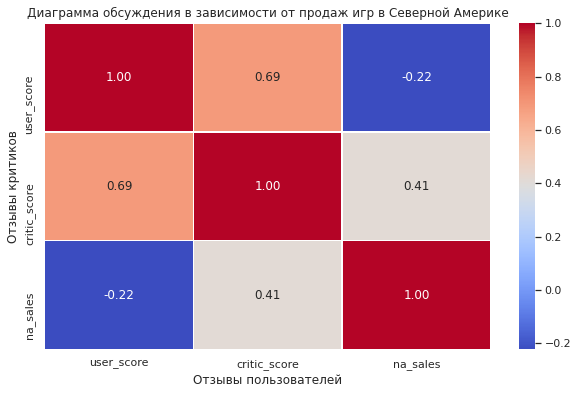

In [31]:
c_score = games['critic_score']/10
games['critic_score'] = c_score
games2 = games.query('platform=="PS3"')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

correlation_matrix = games2[['user_score', 'critic_score', 'na_sales']].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Диаграмма обсуждения в зависимости от продаж игр в Северной Америке')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Отзывы критиков')
plt.show()

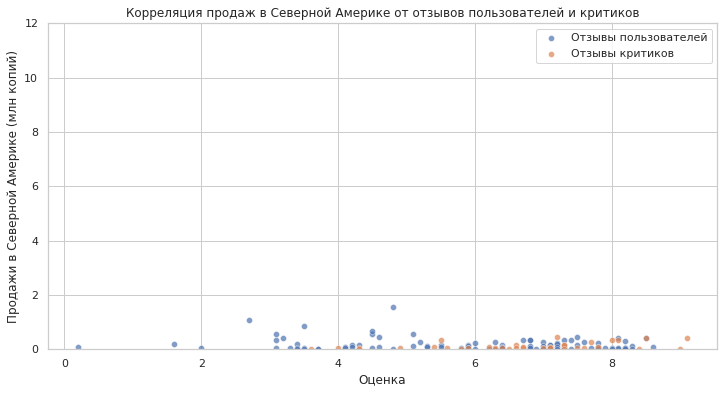

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='na_sales', data=games2, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='na_sales', data=games2, label='Отзывы критиков', alpha=0.7)
plt.title('Корреляция продаж в Северной Америке от отзывов пользователей и критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи в Северной Америке (млн копий)')
plt.ylim(0, 12)
plt.legend()
plt.show()

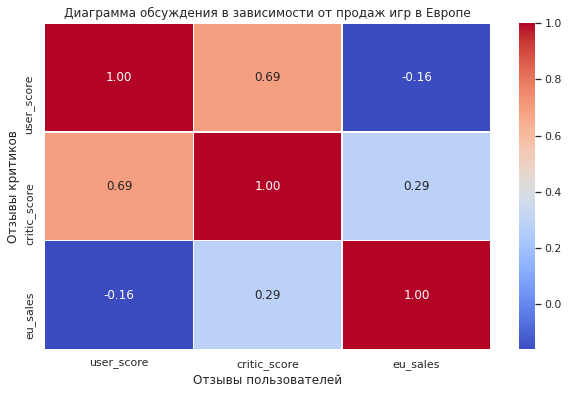

In [33]:


correlation_matrix = games2[['user_score', 'critic_score', 'eu_sales']].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Диаграмма обсуждения в зависимости от продаж игр в Европе')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Отзывы критиков')
plt.show()

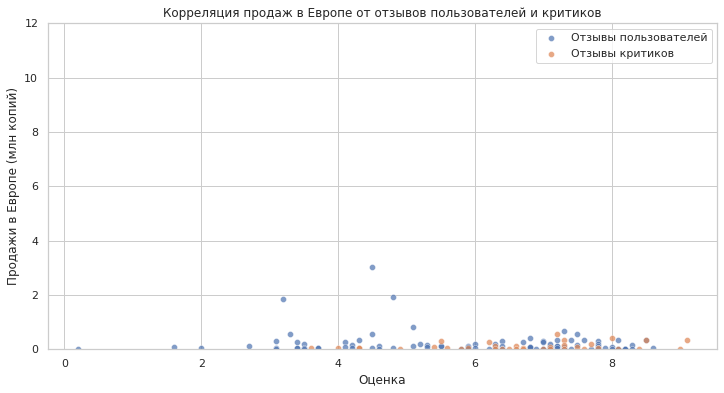

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='eu_sales', data=games2, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='eu_sales', data=games2, label='Отзывы критиков', alpha=0.7)
plt.title('Корреляция продаж в Европе от отзывов пользователей и критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи в Европе (млн копий)')
plt.ylim(0, 12)
plt.legend()
plt.show()

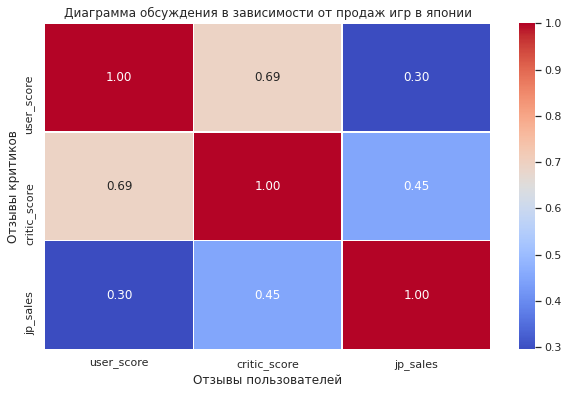

In [35]:
correlation_matrix = games2[['user_score', 'critic_score', 'jp_sales']].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Диаграмма обсуждения в зависимости от продаж игр в японии')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Отзывы критиков')
plt.show()

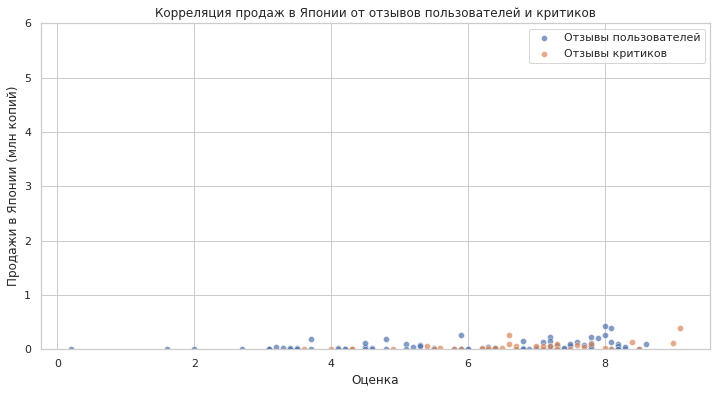

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='jp_sales', data=games2, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='jp_sales', data=games2, label='Отзывы критиков', alpha=0.7)
plt.title('Корреляция продаж в Японии от отзывов пользователей и критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи в Японии (млн копий)')
plt.ylim(0, 6)
plt.legend()
plt.show()

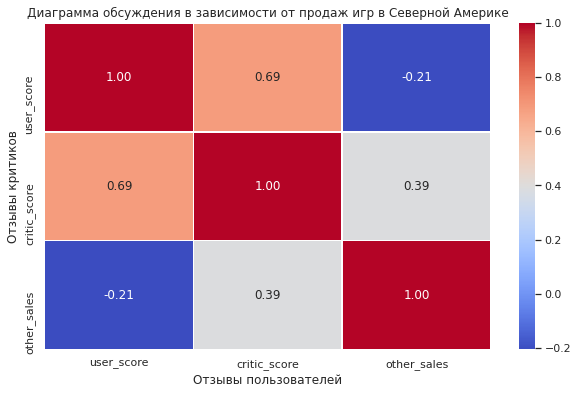

In [37]:
correlation_matrix = games2[['user_score', 'critic_score', 'other_sales']].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Диаграмма обсуждения в зависимости от продаж игр в Северной Америке')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Отзывы критиков')
plt.show()

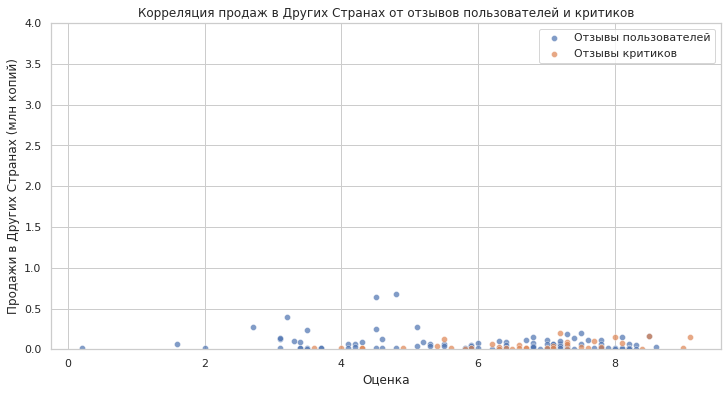

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='other_sales', data=games2, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='other_sales', data=games2, label='Отзывы критиков', alpha=0.7)
plt.title('Корреляция продаж в Других Странах от отзывов пользователей и критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи в Других Странах (млн копий)')
plt.ylim(0, 4)
plt.legend()
plt.show()

**Проверили таким же образом еще 3 платформы(Х360, ПК и ПС4)**


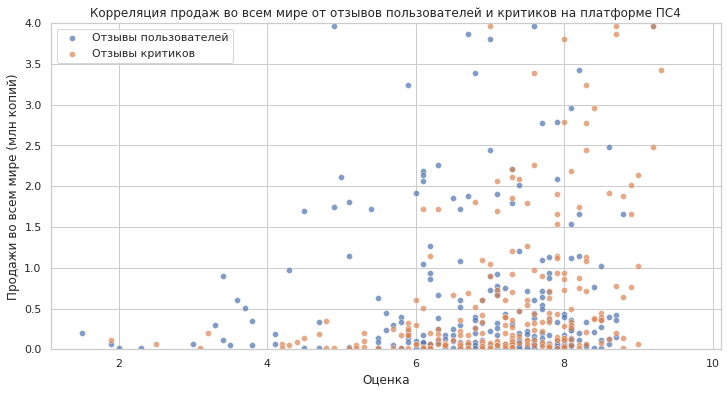

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [39]:
games3 = games.query('platform=="PS4"')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='all_sales', data=games3, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='all_sales', data=games3, label='Отзывы критиков', alpha=0.7)
plt.title('Корреляция продаж во всем мире от отзывов пользователей и критиков на платформе ПС4')
plt.xlabel('Оценка')
plt.ylabel('Продажи во всем мире (млн копий)')
plt.ylim(0, 4)
plt.legend()
plt.show()
games['platform'].unique()

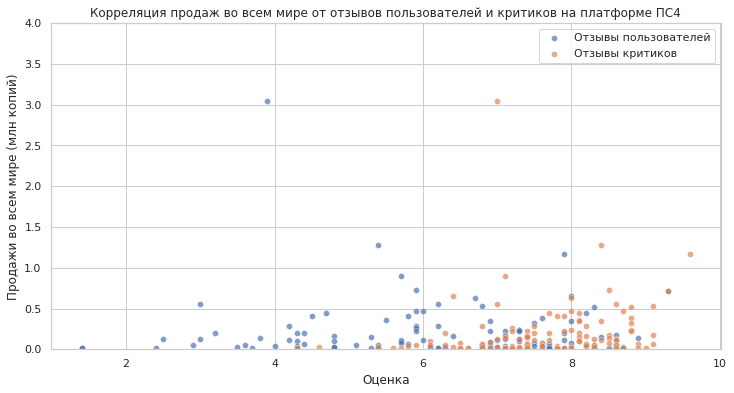

In [40]:
games4 = games.query('platform=="PC"')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='all_sales', data=games4, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='all_sales', data=games4, label='Отзывы критиков', alpha=0.7)
plt.title('Корреляция продаж во всем мире от отзывов пользователей и критиков на платформе ПС4')
plt.xlabel('Оценка')
plt.ylabel('Продажи во всем мире (млн копий)')
plt.ylim(0, 4)
plt.legend()
plt.show()

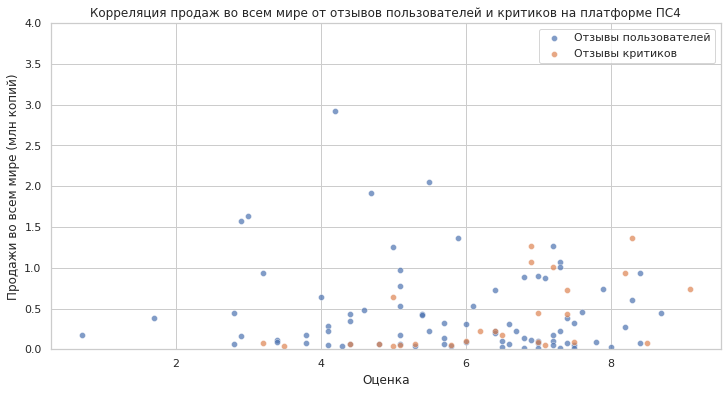

In [41]:
games5 = games.query('platform=="X360"')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='all_sales', data=games5, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='all_sales', data=games5, label='Отзывы критиков', alpha=0.7)
plt.title('Корреляция продаж во всем мире от отзывов пользователей и критиков на платформе ПС4')
plt.xlabel('Оценка')
plt.ylabel('Продажи во всем мире (млн копий)')
plt.ylim(0, 4)
plt.legend()
plt.show()

#### Вывод

**Из построенных тепловых карт для матриц корреляций видно, что зависимости продаж во всех регионах от рейтингов пользователей отсутствует, от рейтинга критиков присутствует средняя корреляция(Вероятно пользователи опираются на мнения критиков при выборе новой игры)**

### Распределение игр по жанрам

In [42]:
games_genres = games.groupby('genre')['name'].count().sort_values(ascending=False)
games_genres

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

**Построили столбчатые диаграммы зависимости продаж в разных регионах от жанра**

In [43]:
# Разделение столбца 'all_sales' на несколько столбцов по платформам
platform_sales = games.pivot_table(index='genre', columns='name', values='all_sales', aggfunc='median')

# Добавление столбца с медианами суммарных продаж для каждого жанра
games['median_sales_by_genre'] = games['genre'].map(platform_sales.median(axis=1))
sgames = games.sort_values(by='median_sales_by_genre', ascending=False)

# Вывод первых строк для проверки
print(sgames[['genre', 'platform', 'all_sales', 'median_sales_by_genre']].head())

         genre platform  all_sales  median_sales_by_genre
31     Shooter      PS4      14.63                   0.62
9292   Shooter       PC       0.13                   0.62
1208   Shooter      PS4       1.54                   0.62
13040  Shooter      PS4       0.05                   0.62
1275   Shooter      PS4       1.49                   0.62


/tmp/ipykernel_48/1587519675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['median_sales_by_genre'] = games['genre'].map(platform_sales.median(axis=1))


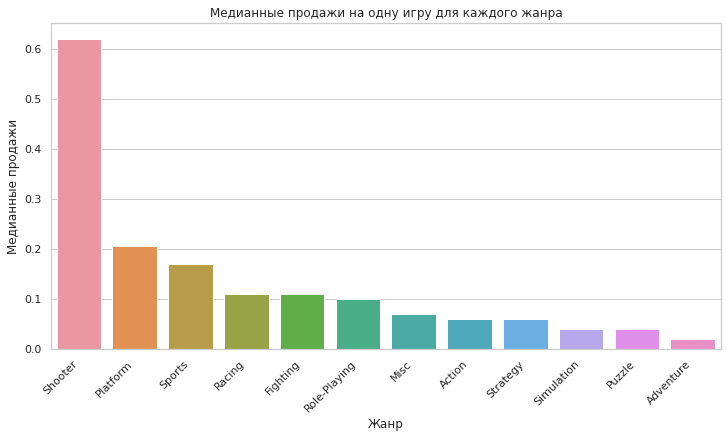

In [44]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='median_sales_by_genre', data=sgames, ci=None)
plt.title('Медианные продажи на одну игру для каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.xticks(rotation=45, ha='right')
plt.show()

**Из построенной столбчатой диаграммы видно, что самую большую популярность имеют жанры: `Rasing`, `Shooter`, `Platform`, `Sports` и `Fighting`. Напротив, жанры: `Strategy`, `Puzzle`, `Adventure`, `Misc` и `Simulation` относительно стабильно покаызывают низкие продажи(Скорее всего эти жанры слишком нишивые, тоесть имеют свою узкую аудиторию).**

## Портрет пользователя

### Северная Америка

**Построили диаграммы продаж в Северной Америке с разбивкой по платформам**

In [45]:
na_platform = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_platform.head(5)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

/tmp/ipykernel_48/2710271327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['platform_category'] = games['platform'].apply(lambda x: x if x in na_platform.head(5) else 'Other')


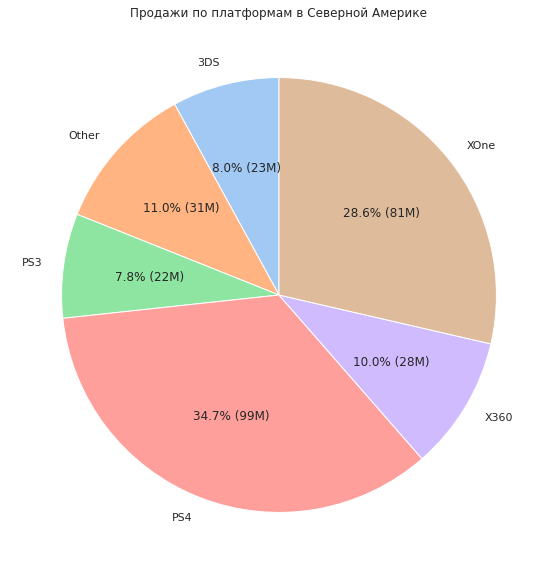

In [46]:
# Создаем столбец 'platform_category' с объединением категорий
games['platform_category'] = games['platform'].apply(lambda x: x if x in na_platform.head(5) else 'Other')

# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('platform_category')['na_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по платформам в Северной Америке')
plt.show()

**Наибольшую часть рынка Северной Америки с большим отрывом занимает `PS4`. На все платформы не из топ 5 приходится лишь 11% рынка**

In [47]:
na_genre = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_genre.head(5)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

/tmp/ipykernel_48/1998760920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['genre_category'] = games['genre'].apply(lambda x: x if x in na_genre.head(5) else 'Other')


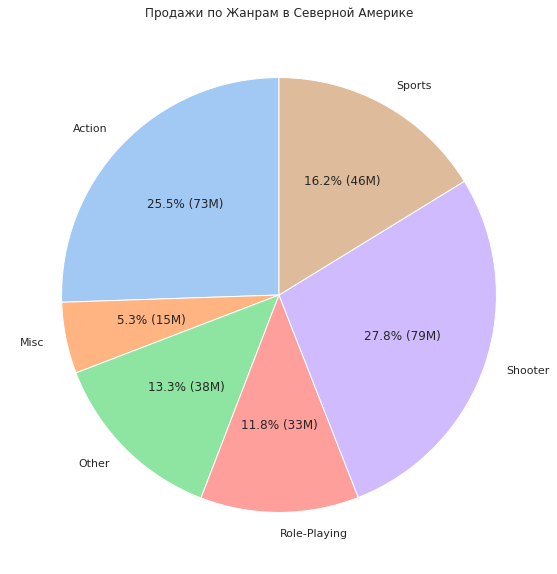

In [48]:
# Создаем столбец 'platform_category' с объединением категорий
games['genre_category'] = games['genre'].apply(lambda x: x if x in na_genre.head(5) else 'Other')

# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('genre_category')['na_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по Жанрам в Северной Америке')
plt.show()

**Из посроенной диаграммы-пирога видно, что в Северной Америке предпочитают быстрые динамичные игры**

### Европа

**Построили диаграммы продаж в Европе с разбивкой по платформам**

In [49]:
eu_platform = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_platform.head(5)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

/tmp/ipykernel_48/1019407458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['platform_category'] = games['platform'].apply(lambda x: x if x in eu_platform.head(5) else 'Other')


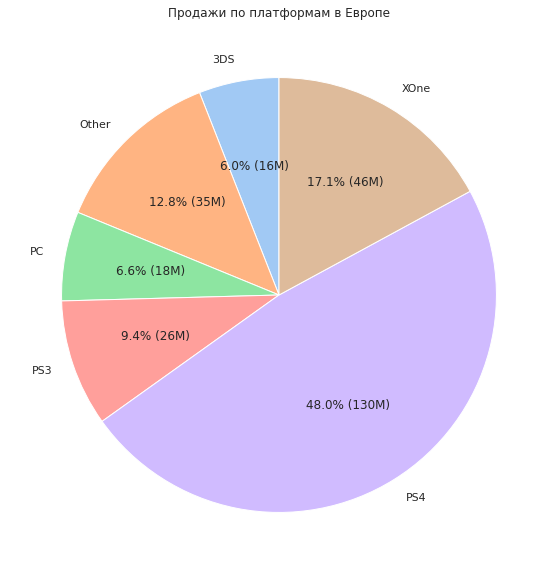

In [50]:
# Создаем столбец 'platform_category' с объединением категорий
games['platform_category'] = games['platform'].apply(lambda x: x if x in eu_platform.head(5) else 'Other')

# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('platform_category')['eu_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по платформам в Европе')
plt.show()

**Самые успешные платформы в Европе - примерно те же, что и в Северной Америке, хотя доли продаж незначительно отличаются**

In [51]:
eu_genre = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_genre.head(5)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

/tmp/ipykernel_48/3360718347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['genre_category'] = games['genre'].apply(lambda x: x if x in eu_genre.head(5) else 'Other')


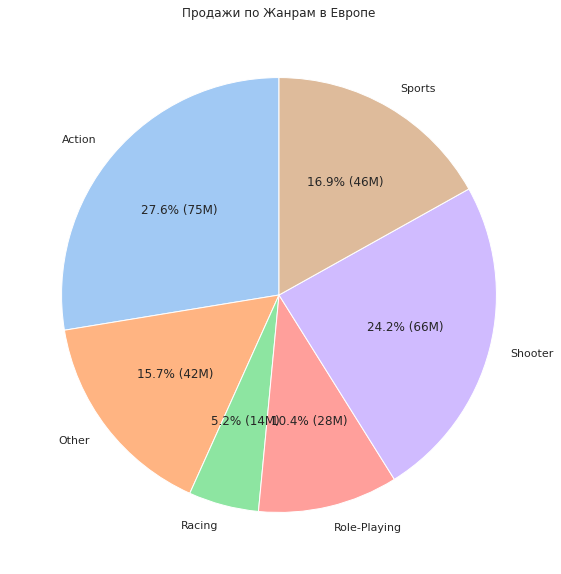

In [52]:
# Создаем столбец 'platform_category' с объединением категорий
games['genre_category'] = games['genre'].apply(lambda x: x if x in eu_genre.head(5) else 'Other')

# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('genre_category')['eu_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по Жанрам в Европе')
plt.show()

**Самые популярные жанры в Европе те же самые, что и с Северной Америке**

### Япония

**Построили диаграммы продаж в Японии с разбивкой по платформам**

In [53]:
jp_platform = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_platform.head(5)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

/tmp/ipykernel_48/312346206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['platform_category'] = games['platform'].apply(lambda x: x if x in jp_platform.head(5) else 'Other')


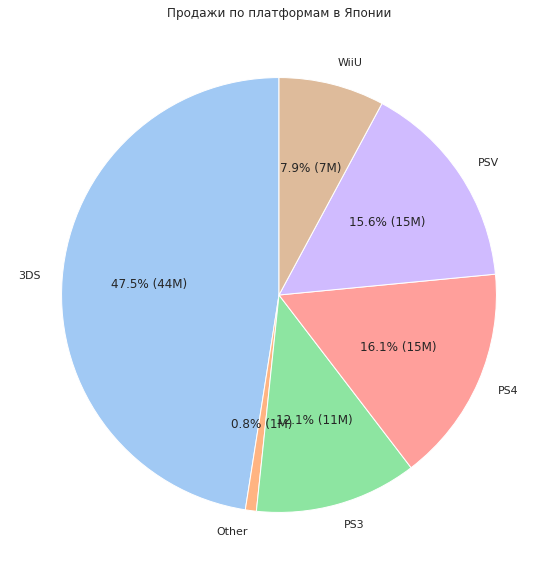

In [54]:
# Создаем столбец 'platform_category' с объединением категорий
games['platform_category'] = games['platform'].apply(lambda x: x if x in jp_platform.head(5) else 'Other')

# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('platform_category')['jp_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по платформам в Японии')
plt.show()

**В Японии 99% рынка делят платформы из топ 5. В отличии от двух предыдущих стран в Японии почти 50% рынка занимает `3DS`**

In [55]:
jp_genre = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_genre.head(5)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

/tmp/ipykernel_48/2680167389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['genre_category'] = games['genre'].apply(lambda x: x if x in jp_genre.head(5) else 'Other')


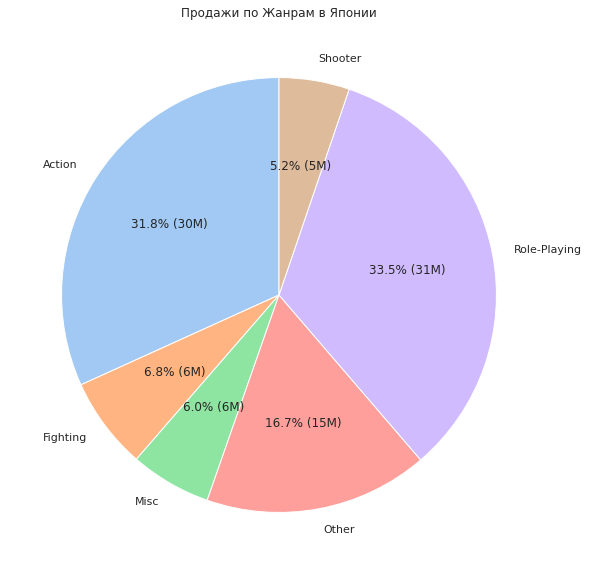

In [56]:
# Создаем столбец 'platform_category' с объединением категорий
games['genre_category'] = games['genre'].apply(lambda x: x if x in jp_genre.head(5) else 'Other')

# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('genre_category')['jp_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по Жанрам в Японии')
plt.show()

**В отличие от двух предыдущих игр в Японии самый популярный жанр - `Role_Playing`**

### Другие страны

**Построили диаграммы продаж в Других странах с разбивкой по платформам**

In [57]:
other_platform = games.groupby('platform')['other_sales'].sum().sort_values(ascending=False)
other_platform.head(5)

platform
PS4     44.48
XOne    12.52
PS3      9.37
X360     4.35
3DS      3.68
Name: other_sales, dtype: float64

/tmp/ipykernel_48/338088143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['platform_category'] = games['platform'].apply(lambda x: x if x in other_platform.head(5) else 'Other')


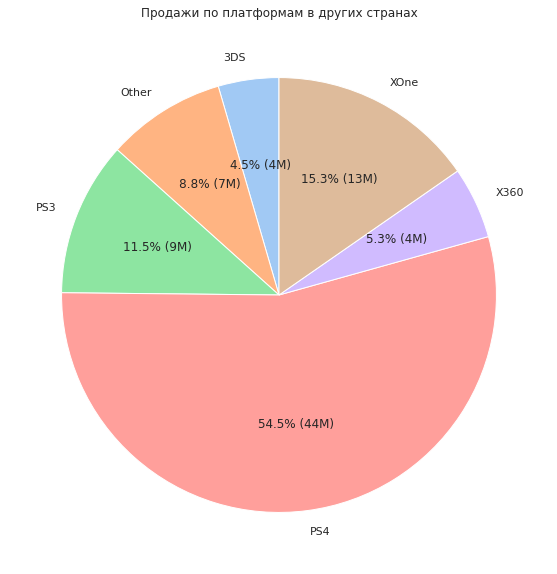

In [58]:
# Создаем столбец 'platform_category' с объединением категорий
games['platform_category'] = games['platform'].apply(lambda x: x if x in other_platform.head(5) else 'Other')
# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('platform_category')['other_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по платформам в других странах')
plt.show()

**Продажи в этом регионе примерно такие же, как и в Европе и Северной Америке.**

In [59]:
other_genre = games.groupby('genre')['other_sales'].sum().sort_values(ascending=False)
other_genre.head(5)

genre
Action          22.57
Shooter         21.53
Sports          14.36
Role-Playing     8.64
Misc             4.03
Name: other_sales, dtype: float64

/tmp/ipykernel_48/4236464559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['genre_category'] = games['genre'].apply(lambda x: x if x in other_genre.head(5) else 'Other')


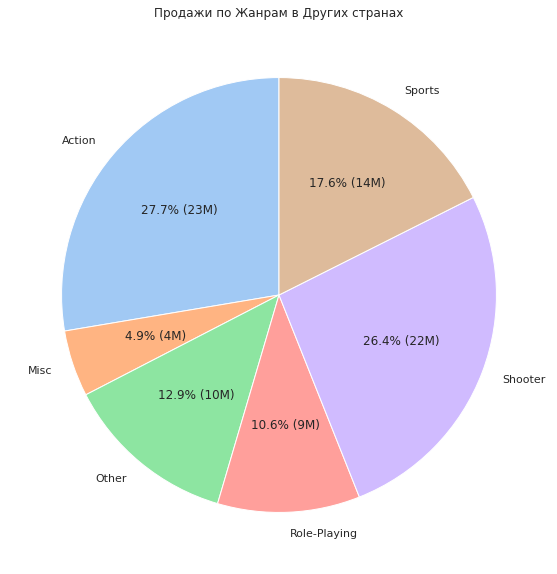

In [60]:
# Создаем столбец 'platform_category' с объединением категорий
games['genre_category'] = games['genre'].apply(lambda x: x if x in other_genre.head(5) else 'Other')

# Подсчитываем продажи по каждой категории
sales_by_category = games.groupby('genre_category')['other_sales'].sum()
 
# Создаем диаграмму-пирог
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct=lambda p: '{:.1f}% ({:.0f}M)'.format(p, p * sum(sales_by_category) / 100), startangle=90, colors=sns.color_palette('pastel'))
plt.title('Продажи по Жанрам в Других странах')
plt.show()

### Рейтиг ESRB

**Проверили, как на продажи игр влияет их рейтинг ESRB**

#### Северная Америка

In [61]:
na_rating = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rating.head(5)

rating
M          96.42
No ESRB    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

**Из полученных данных видно, что самые большие продажи пренадлежат играм с рейтингом ESRB `E`(То есть без возрастных ограничений).  Так же видно, что, чем выше возрастные ограничения, тем меньше продажи(Вероятнее всего причина в том, что чем меньше возрастные ограничения, тем большей аудитории доступна эта игра). Рейтинг `No ESRB` в данном исследовании не учитывали**

#### Европа

In [62]:
eu_rating = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating.head(5)

rating
M          93.44
No ESRB    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

**Полученные данные примерно те же, что и в Северной Америке. Причины вероятно те же**

#### Япония

In [63]:
jp_rating = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rating.head(5)

rating
No ESRB    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

**В Японии большинство продаж приходится на категорию `No ESRB`, а в категории `E` продажи и вовсе отсутствуют. Отсюда можно сделать вывод, что в данном регионе пропуски - это и есть игры без возрастных ограничений**

#### Остальные страны

In [64]:
other_rating = games.groupby('rating')['other_sales'].sum().sort_values(ascending=False)
other_rating.head(5)

rating
M          28.67
No ESRB    18.40
E          15.39
T          11.33
E10+        7.83
Name: other_sales, dtype: float64

**Ситуация та же, что и в остальных регионах**

#### Вывод

**Из проведенного исследования видно, что продажи игр коррелируют с рейтингом ESRB, а именно, чем выше возрастные ограничения, тем меньше продажи. При чем разница очень серьёзная. Поэтому имеет смысл создавать игры без возрастных ограничений**

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### H0(Нулевая гипотеза): Средние значения по генеральным выборкам пользовательских рейтингов платформ Xbox One и PC одинаковые

#### H1(Альтернаятивная гипотеза): Средние значения по генеральным выборкам пользовательских рейтингов платформ Xbox One и PC отличаются

In [65]:
xbox_games = games.query('platform=="XOne"')['user_score'].dropna().reset_index(drop=True)
pc_games = games.query('platform=="PC"')['user_score'].dropna().reset_index(drop=True)
display(xbox_games.head())
pc_games.head()

0    7.9
1    5.4
2    6.4
3    6.2
4    4.1
Name: user_score, dtype: float32

0    3.9
1    5.4
2    7.9
3    5.7
4    5.9
Name: user_score, dtype: float32

In [66]:
t_stat, p_value = ttest_ind(xbox_games, pc_games, equal_var=False)

# Печать результатов теста
print(f'T-stat: {t_stat}')
print(f'p-value: {p_value}')

# Уровень значимости (в данном случае имеет смысл выбрать 0.05)
alpha = 0.05

# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние значения по генеральным выборкам пользовательских рейтингов платформ Xbox One и PC не имеют статистически значимых отличий")
else:
    print("Не отвергаем нулевую гипотезу: Средние значения по генеральным выборкам пользовательских рейтингов платформ Xbox One и PC не имеют статистически значимых отличий")

T-stat: 1.5777542170277106
p-value: 0.11601545900050317
Не отвергаем нулевую гипотезу: Средние значения по генеральным выборкам пользовательских рейтингов платформ Xbox One и PC не имеют статистически значимых отличий


#### Вывод 

**Нулевую гипотезу: `средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий`, - не следует отвергать**

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### H0(нулевая гипотеза): Средние значения по генеральной выборке пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не имеют статистически значимых отличий.

#### H1(альтернативная гипотеза): Средние значения по генеральной выборке пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») имеют значимые статистические отличия.

In [67]:
action_games = games.query('genre=="Action"')['user_score'].dropna().reset_index(drop=True)
sports_games = games.query('genre=="Sports"')['user_score'].dropna().reset_index(drop=True)

display(action_games.head())
sports_games.head()

0    8.3
1    7.9
2    8.1
3    6.3
4    4.9
Name: user_score, dtype: float32

0    4.3
1    5.0
2    5.7
3    4.5
4    6.7
Name: user_score, dtype: float32

In [68]:
t_stat, p_value = ttest_ind(action_games, sports_games, equal_var=False)

# Печать результатов теста
print(f'T-stat: {t_stat}')
print(f'p-value: {p_value}')

# Уровень значимости (в данном случае имеет смысл выбрать 0.05)
alpha = 0.05

# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние значения по генеральной выборке пользовательских рейтингов жанров Action  и Sports имеют статистически значимые отличия")
else:
    print("Не отвергаем нулевую гипотезу: Средние значения по генеральной выборке пользовательских рейтингов жанров Action  и Sports не имеют статистически значимых отличий")

T-stat: 8.38461351186689
p-value: 1.1825638224397033e-14
Отвергаем нулевую гипотезу: Средние значения по генеральной выборке пользовательских рейтингов жанров Action  и Sports имеют статистически значимые отличия


#### Вывод

**Отвергаем нулевую гипотезу: Средние значения по генеральной выборке пользовательских рейтингов жанров Action  и Sports имеют статистически значимые отличия**

## Вывод

**В данной работе исследовались закономерности ключевых факторов продаваемости компьютерных игр. Исходные данные представляют собой таблицу с информацией об играх, проданных до 2016 года. Датасет содержит данные о продажах игр в четырех регионах, рейтингах пользователей и критиков и т.д**

**Была проведена предобработка исходных данных, в которой:**
- `Изменили тип данных столбца Year_of_Realise на datetime, Critic_Scope на int и User_scope на int`;
- `Избавились от пропусков`;
- `Убедились в отсутствии дубликатов`;

**Сделали вывод о пригодности исходных данных**

**Провели исследовательский анализ данных:**
- `Проверили, сколько игр выпускалось в разные годы. Изучение этих данных показало, что до 1997 года игр выпускалось сильно меньше, чем в последние года. наибольшее их количество было выпущено в 2008-2011 годах (Это связано с лавинообразным ростом распространения интернета и игровой индустрии в частности). Имеет смысл рассматривать данные за 1997- 2016 года`   
- `Посмотрели, как менялись продажи по платформам. Изучили платформы с наибольшими суммарными продажами и построили распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы.
Из построенных распределений видно, что платформы с самым большим количеством игр уже не актуальны(кроме ПС3). Поэтому для построения прогноза необходимо использовать именно самые новые данные(с достаточным количеством данных для исследования). Например ПС3, Х360, ПК и ПС4`
- `Построили диаграмму размаха и вычислили основные показатели по глобальным продажам игр в разбивке по платформам`
- `Исследовали корреляцию продаж в разных регионах с отзывами критиков и пользователей. Выяснили, что зависимость от рейтинга критиков есть, но не слишком сильно(коэффициент корреляции около 0.5). Зависимости от рейтинга пользователей отсутствует(Картина идентична для всех платформ)`
- `Исследовали распределение игр по жанрам. Из построенной столбчатой диаграммы видно, что самую большую популярность имеют жанры: Rasing, Shooter, Platform, Sports и Fighting. Напротив, жанры: Strategy, Puzzle, Adventure, Misc и Simulation относительно стабильно покаызывают низкие продажи(Скорее всего эти жанры слишком нишивые, тоесть имеют свою узкую аудиторию).`


**Составили портрет пользователя каждого региона**
- `Самые популярные жанры во всех регионах - это рейсинг, спорт, файтинг, ролевые игры и платформ(пользователи любят быстрые и динамичные игры с острым сюжетом). Различия по подажам довольно существенные`
- `Самые популярные платформы во всех 4-х регионах, это PS и XBox`
- `Исследовали зависимость продаж во всех регионах от рейтинга ESRB. Сделали вывод, что чем выше возрастные ограничения, тем меньше продажи(Верно для всех 4-х регионах)`

**Проверили гипотезы и получили результаты:**
- `Нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий, - не следует отвергать`
- `Отвергаем нулевую гипотезу: Средние значения по генеральной выборке пользовательских рейтингов жанров Action  и Sports имеют статистически значимые отличия`

**Прогноз на 2017 год**
- `В последние годы количество проданных игр держалось в районе 600. Вероятно, в 2017 году будет выпущено также в районе 600 игр`
- `Некогда самые популярные игровые платформы PS2, PS3, DC и т.д уходят в прошлое; им на смену прийдут более новые модели`
- `Следует обратить особое внимание на платформу PS4, как на самую прибыльную из всех`
- `Топ самых продаваемых жанров врядли сильно изменится. Особое внимание следует обратить на жанры: ACTION, SPORTS и SHOOTER`
- `Процент игр из топ 5 самых продаваемых жанров от общего количества игр, выпущенных за 2017 год, вероятно, увеличится. В таком случае можно ожидать увеличения продаж во всех регионах`